In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Ⅰ. Perceptron

* 퍼셉트론은 다수의 입력값을 받아 하나의 출력값을(1 또는 0)를 전달.

![](../img/perceptron.PNG)

$
\mathbf{y} =
  \begin{cases}
    0        & \quad (\mathbf{w}^T \cdot \mathbf{x} + \mathbf{b} \leq 0) \\
    1  & \quad (\mathbf{w}^T \cdot \mathbf{x} + \mathbf{b} \gt 0)
  \end{cases}
$

$
\mathbf{x} \text{ : input vector} \\
\mathbf{y} \text{ : output} \\
\mathbf{w} \text{ : weight, input에 주는 영향력} \\
\mathbf{b} \text{ : bias, 얼마나 쉽게 활성화 되는지}$

### 1. AND Gate

In [2]:
def AND(x):
    w = [1.0, 1.0]
    b = -1.0
    return int(np.dot(x, w) +b > 0)

for x in [[0,0], [0,1], [1,0], [1,1]]:
    print(f'AND({x}) = {AND(x)}')

AND([0, 0]) = 0
AND([0, 1]) = 0
AND([1, 0]) = 0
AND([1, 1]) = 1


### 2. NAND Gate

In [3]:
def NAND(x):
    w = [-1.0, -1.0]
    b = 2.0
    return int(np.dot(x, w) + b > 0)

for x in [[0,0], [0,1], [1,0], [1,1]]:
    print(f'NAND({x}) = {NAND(x)}')

NAND([0, 0]) = 1
NAND([0, 1]) = 1
NAND([1, 0]) = 1
NAND([1, 1]) = 0


### 3. OR Gate

In [4]:
def OR(x):
    w = [1.0, 1.0]
    b = - 0.5
    return int(np.dot(x, w) + b > 0)

for x in [[0,0], [0,1], [1,0], [1,1]]:
    print(f'OR({x}) = {OR(x)}')

OR([0, 0]) = 0
OR([0, 1]) = 1
OR([1, 0]) = 1
OR([1, 1]) = 1


### 4. XOR Gate

* 단층 퍼셉트론으로 AND, NAND, OR 게이트는 구현 가능하지만, XOR 게이트는 구현할 수 없음
<img src="../img/or-vs-xor.png" width="60%" height="60%"/>
  
  
* 다층 퍼센트론 으로 XOR 게이트를 구현할 수 있다.
<img src="../img/xor_gate2.png" width="30%" height="20%"/>

In [5]:
def XOR(x):
    return AND([OR(x), NAND(x)])

for x in [[0,0], [0,1], [1,0], [1,1]]:
    print(f'XOR({x}) = {XOR(x)}')

XOR([0, 0]) = 0
XOR([0, 1]) = 1
XOR([1, 0]) = 1
XOR([1, 1]) = 0


## Ⅱ. Activation function

* 출력 신호의 총합을 출력 신호로 변환하는 함수

<img src="../img/3-04.png" width="20%" height="20%"/>

### 1. step function

$$
y =
  \begin{cases}
    0        & \quad (x \leq 0) \\
    1  & \quad (x \gt 0)
  \end{cases}
$$

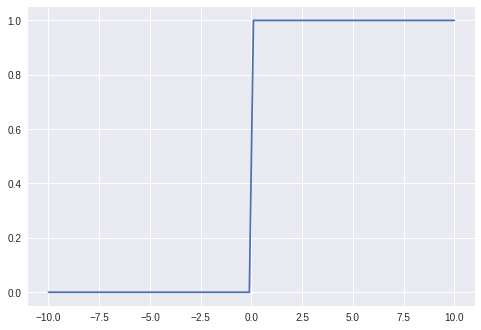

In [6]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.linspace(-10, 10, 100)
y = step_function(x)

plt.plot(x, y)
plt.show()

### 2. sigmoid function

$$
y = \frac{1}{1 + e^{-x}}
$$

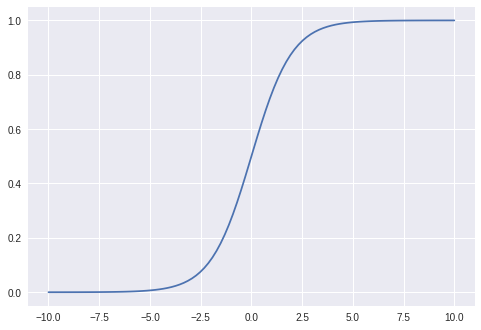

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

### 3. ReLU function

$$
y =
  \begin{cases}
    0  & \quad (x \leq 0) \\
    x  & \quad (x \gt 0)
  \end{cases}
$$

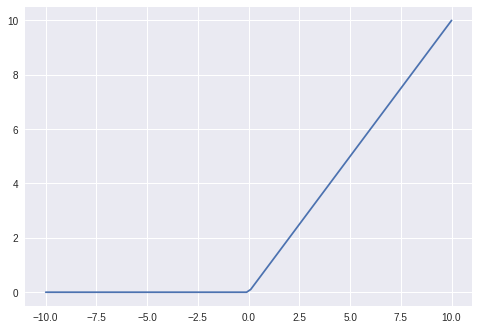

In [8]:
def ReLU(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 100)
y = ReLU(x)

plt.plot(x, y)
plt.show()

## Ⅲ. Activation function of output layer

### 1. regression : identity function

In [9]:
def identity(x):
    return x

identity([1, 4, 8])

[1, 4, 8]

### 2. classification : softmax function

$$
y_k = \frac{\displaystyle\text{exp}(a_k)}{\displaystyle\sum_{i=1}^{n}\text{exp}(a_i)}
$$

In [10]:
def bad_softmax(x):
    exp = np.exp(x)
    return exp/exp.sum()

bad_softmax([1, 4, 8])

array([8.94679497e-04, 1.79701181e-02, 9.81135202e-01])

> 하지만 위의 계산 방식은 오버플로우에 취약함

In [11]:
bad_softmax([1010, 1000, 990])

/home/jsg/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/jsg/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([nan, nan, nan])

In [12]:
def softmax(x):
    max_x = np.max(x)
    exp = np.exp(x - max_x)
    return exp/exp.sum()

softmax([1010, 1000, 990])

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

> 소프트맥스 함수는 원소의 대소 관계를 변화시키지 않기 때문에 loss계산에만 쓰고 predict에선 생략가능

## Ⅳ. 신경망 구현

<img src="../img/3-15.png" width="50%" height="50%"/>

### 1. single layer

$$
\mathbf{y} = \text{h} \, (\mathbf{x \cdot W} + \mathbf{b})
$$

In [13]:
class LinearLayer:
    
    def __init__(self, w, b):
        self.w = np.array(w)
        self.b = np.array(b)

    def forward(self, x):
        return np.dot(x, self.w) + self.b

x = [1.0, 0.5]
w = [[0.1, 0.3, 0.5],
     [0.2, 0.4, 0.6]]
b = [0.1, 0.2, 0.3]

linear = LinearLayer(w, b)
sigmoid(linear.forward(x))

array([0.57444252, 0.66818777, 0.75026011])

### 2. multi layers

In [14]:
class NeuralNetwork:

    def __init__(self):
        self.layer1 = LinearLayer([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]], [0.1, 0.2, 0.3])
        self.layer2 = LinearLayer([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]], [0.1, 0.2])
        self.layer3 = LinearLayer([[0.1, 0.3], [0.2, 0.4]], [0.1, 0.2])

    def forward(self, x):
        output = sigmoid(self.layer1.forward(x))
        output = sigmoid(self.layer2.forward(output))
        output = self.layer3.forward(output)
        return output

nn = NeuralNetwork()
nn.forward([1.0, 0.5])

array([0.31682708, 0.69627909])

## Ⅴ. Batch

* 입력이 한개

<img src="../img/3-26.png" width="50%" height="50%"/>

* 입력이 여러개 (배치)

<img src="../img/3-27.png" width="50%" height="50%"/>

## Ⅵ. MNIST 데이터셋에 적용

In [15]:
import sys, os, pickle
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

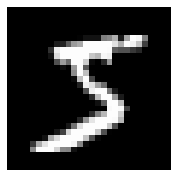

In [16]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True)

plt.figure(figsize=(3, 3))
plt.axis('off')
img = x_train[0].reshape(28, 28)
plt.imshow(img, 'gray')

In [17]:
class MnistClassifier():
    
    def __init__(self):
        with open('../dataset/sample_weight.pkl', 'rb') as f:
            weights = pickle.load(f)
        self.linear1 = LinearLayer(weights['W1'], weights['b1'])
        self.linear2 = LinearLayer(weights['W2'], weights['b2'])
        self.linear3 = LinearLayer(weights['W3'], weights['b3'])
    
    def forward(self, x):
        output = sigmoid(self.linear1.forward(x))
        output = sigmoid(self.linear2.forward(output))
        output = softmax(self.linear3.forward(output))
        return output

<img src="../img/mnist_nn.png" width="50%" height="50%"/>

In [18]:
clf = MnistClassifier()

batch_size = 100
correct = 0

for i in range(0, len(x_test), batch_size):
    X, y = x_test[i:i+batch_size], t_test[i:i+batch_size]
    y_pred = np.argmax(clf.forward(X), axis = 1)
    correct += np.sum(y == y_pred)

print(f'Accuracy : {correct/len(x_test):.3f}')

Accuracy : 0.935


## Ⅶ. Loss Function

* 신경망 성능의 나쁨을 나타내는 지표

### 1. Mean Squared Error

$$
E = \frac{1}{2N}\displaystyle\sum_n\sum_k (y_k - t_k )^2
$$

In [19]:
def MSE(y, t):
    return 0.5 * np.sum((y-t)**2)

MSE(np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]),
    np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]))

0.09750000000000003

### 2. Cross Entropy Error

$$
E = -\frac{1}{N}\displaystyle \sum_n \sum_k t_k \log y_k
$$

In [20]:
def CrossEntropyOneHotEncoded(y, t):
    if y.ndim == 1:
        y, t = y.reshape(1,-1), t.reshape(1, -1)
    
    delta = 1e-7 # log가 무한으로 발산하지 않게 하기 위한
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+delta)) / batch_size

CrossEntropyOneHotEncoded(np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]),
    np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]))

0.510825457099338

In [21]:
def CrossEntropy(y, t):
    if y.ndim == 1:
        y, t = y.reshape(1,-1), t.reshape(1, -1)
    
    delta = 1e-7 # log가 무한으로 발산하지 않게 하기 위한
    batch_size = y.shape[0]
    return -np.sum((np.eye(y.shape[-1])[t])*np.log(y+delta)) / batch_size

CrossEntropy(np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]),
    np.array(2))

0.510825457099338